In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [45]:
img_ori = cv2.imread('lenna.jpg',1)
img_gray = cv2.imread('lenna.jpg',0)
img_ori.shape

(500, 500, 3)

In [6]:
cv2.imshow('lenna', img_ori)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

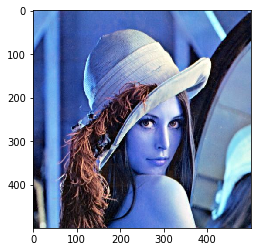

In [8]:
plt.imshow(img_ori)
plt.show()

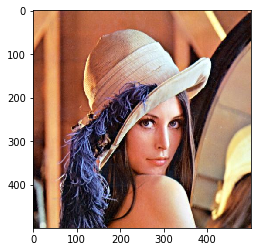

In [9]:
plt.imshow(cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
plt.rcParams['figure.figsize']

[6.4, 4.8]

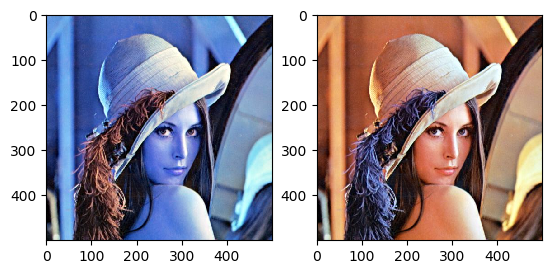

In [32]:
plt.subplot(121)
plt.imshow(img_ori)
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB))
plt.show()

In [78]:
def my_show(img,size=(2,2)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

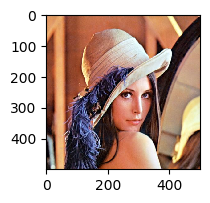

In [79]:
my_show(img_ori)

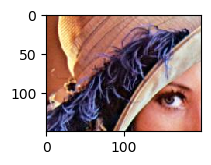

In [80]:
img_crop = img_ori[150:300,100:300]
my_show(img_crop)

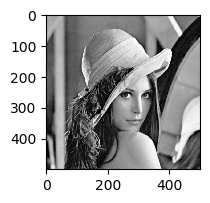

In [77]:
plt.figure(figsize=(2,2))
plt.imshow(img_gray,cmap='gray')
plt.show()

In [50]:
B,G,R = cv2.split(img_ori)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

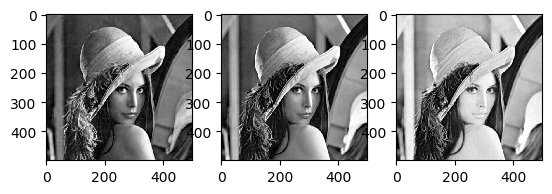

In [52]:
plt.subplot(131)
plt.imshow(B,cmap='gray')
plt.subplot(132)
plt.imshow(G,cmap='gray')
plt.subplot(133)
plt.imshow(R,cmap='gray')
plt.show()

In [57]:
def img_cooler(img,b_increase,r_decrease):
    B,G,R = cv2.split(img)
    b_lim = 255 - b_increase
    B[B > b_lim] = 255
    B[B <= b_lim] = (b_increase + B[B <= b_lim]).astype(img.dtype)
    r_lim = r_decrease
    R[R < r_lim] = 0
    R[R >= r_lim] = (R[R >= r_lim] - r_decrease).astype(img.dtype)
    return cv2.merge((B,G,R))

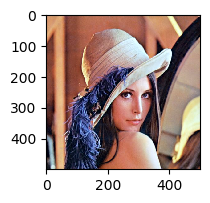

In [63]:
img_cool = img_cooler(img_ori,10,10)
my_show(img_cool)

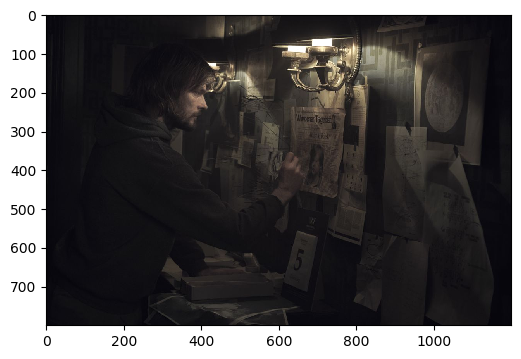

In [83]:
img_dark = cv2.imread('dark.jpg')
my_show(img_dark,size=(6,6))

In [84]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img_dark, table)

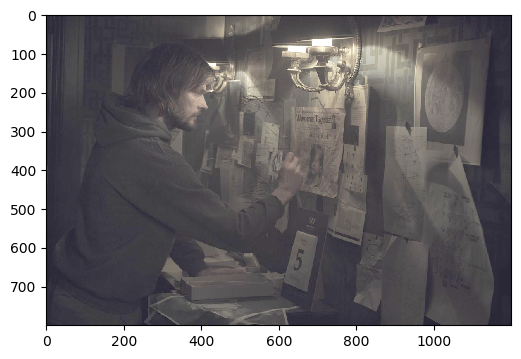

In [87]:
img_brighter = adjust_gamma(img_dark,2)
my_show(img_brighter,size=(6,6))

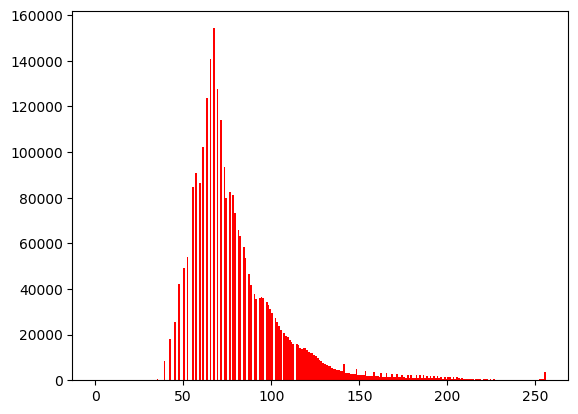

In [88]:
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
plt.show()

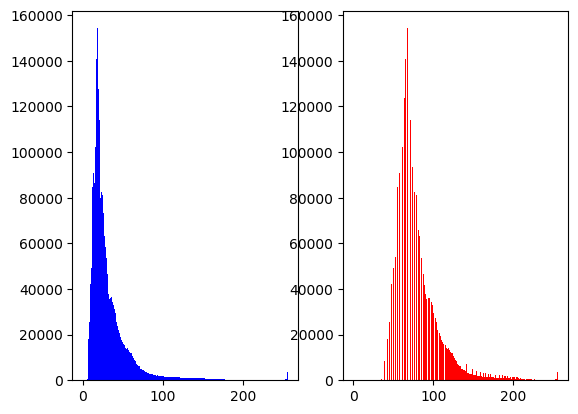

In [90]:
plt.subplot(121)
plt.hist(img_dark.flatten(), 256, [0, 256], color = 'b')
plt.subplot(122)
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
plt.show()

In [91]:
img_yuv = cv2.cvtColor(img_brighter, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])   # only for 1 channel
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)   # y: luminance(明亮度), u&v: 色度饱和度

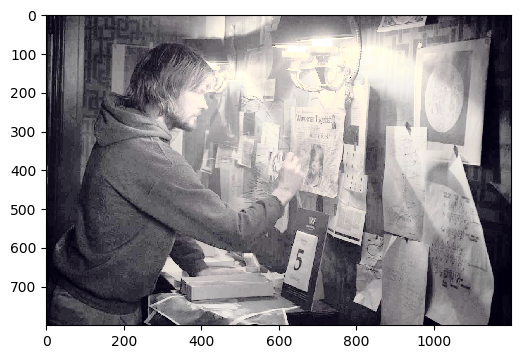

In [92]:
my_show(img_output,size=(6,6))

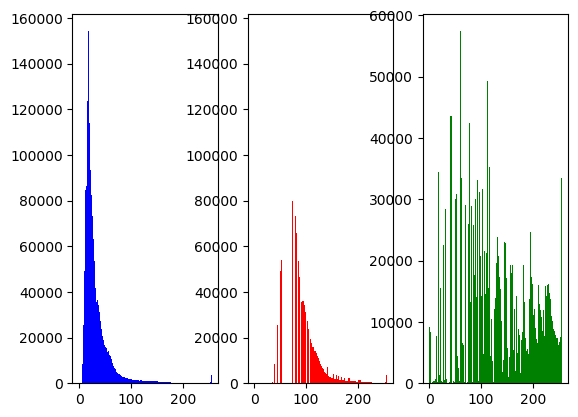

In [93]:
plt.subplot(131)
plt.hist(img_dark.flatten(), 256, [0, 256], color = 'b')
plt.subplot(132)
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
plt.subplot(133)
plt.hist(img_output.flatten(), 256, [0, 256], color = 'g')
plt.show()

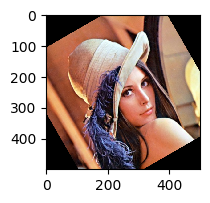

In [96]:
M = cv2.getRotationMatrix2D((img_ori.shape[1] / 2, img_ori.shape[0] / 2), 30, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img_ori, M, (img_ori.shape[1], img_ori.shape[0]))
my_show(img_rotate)

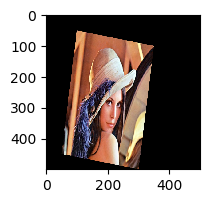

In [101]:
# Affine Transform
rows, cols, ch = img_ori.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.7, rows * 0.2], [cols * 0.1, rows * 0.9]])
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img_ori, M, (cols, rows))
my_show(dst)

In [104]:
# perspective transform
import random
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp

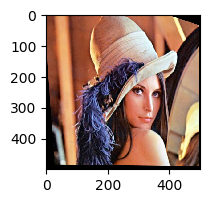

In [108]:
M_warp, img_warp = random_warp(img_ori, img_ori.shape[0], img_ori.shape[1])
my_show(img_warp)